Lab Assignment 6

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:

df = pd.read_csv('historical_automobile_sales.csv')

# Display the first few rows of the DataFrame
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


### Q1. Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

Include the following on the plot

ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession


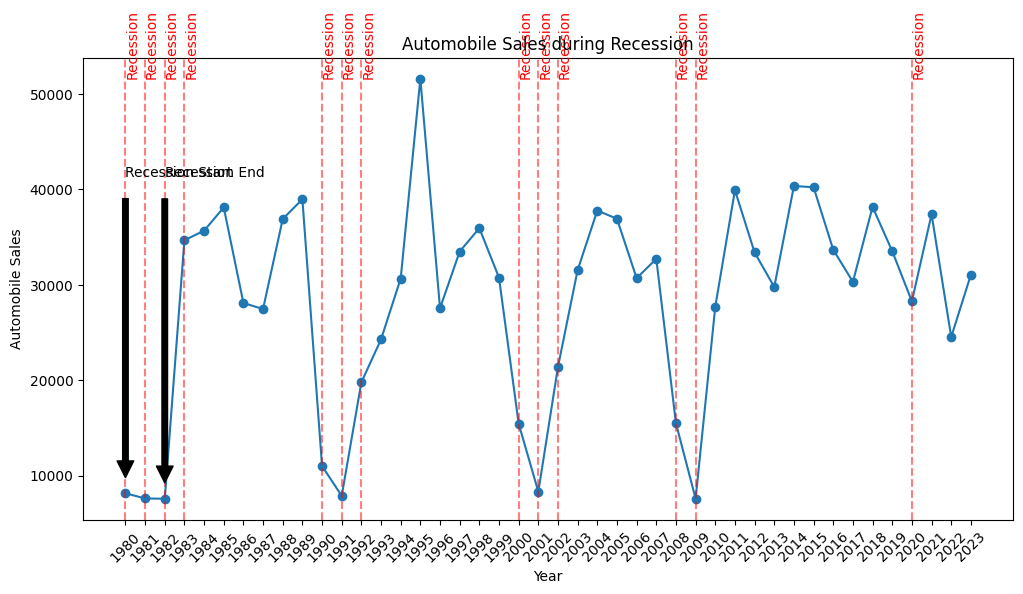

In [7]:
# Group the data by year and sum the automobile sales
sales_by_year = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', marker='o')

# Add title and labels
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add ticks on x-axis with all the years
plt.xticks(sales_by_year.index, rotation=45)

# Annotate years of recession
recession_years = df[df['Recession'] == 1]['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)
    plt.text(year, sales_by_year.max(), 'Recession', rotation=90, verticalalignment='bottom', color='red')

# Annotate at least two years of recession
plt.annotate('Recession Start', xy=(1980, sales_by_year.loc[1980]), xytext=(1980, sales_by_year.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Recession End', xy=(1982, sales_by_year.loc[1982]), xytext=(1982, sales_by_year.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Q2. Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

From the plot, what insights have you gained on the sales of various vehicle types?


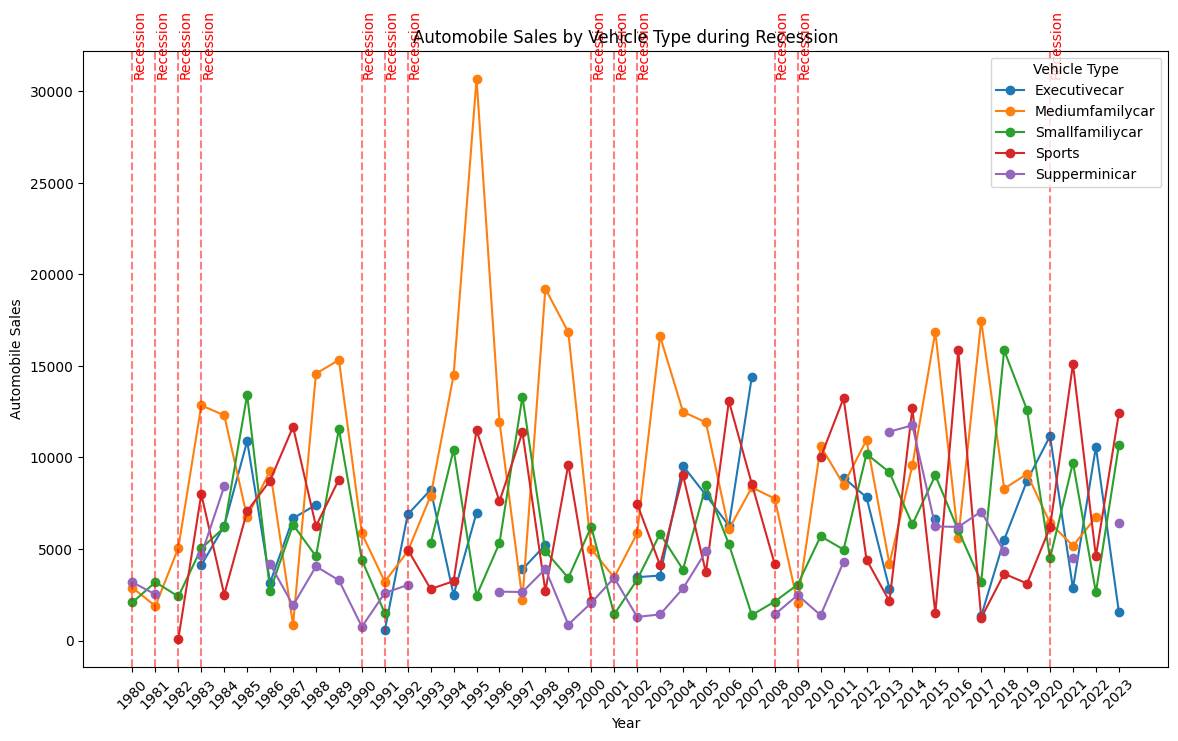

In [9]:
# Group the data by year and vehicle type, then sum the automobile sales
sales_by_year_vehicle = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the data
plt.figure(figsize=(14, 8))
sales_by_year_vehicle.plot(kind='line', marker='o', ax=plt.gca())

# Add title and labels
plt.title('Automobile Sales by Vehicle Type during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add ticks on x-axis with all the years
plt.xticks(sales_by_year.index, rotation=45)

# Annotate years of recession
for year in recession_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)
    plt.text(year, sales_by_year_vehicle.max().max(), 'Recession', rotation=90, verticalalignment='bottom', color='red')

plt.legend(title='Vehicle Type')
plt.show()


### Insights from the Sales Trends of Various Vehicle Types

1. **Recession Impact**: 
    - During recession years, there is a noticeable decline in automobile sales across most vehicle types. For instance, sales dropped significantly in the years 1980-1982, 1990-1992, 2000-2002, 2008-2009, and 2020.
    - The sales of certain vehicle types, such as Supperminicar and Smallfamilycar, tend to be more resilient during recessions compared to others like Executivecar and Sports.

2. **Recovery Periods**:
    - Post-recession periods often show a sharp increase in sales as the economy recovers. For example, there is a significant rise in sales in 1983, 1993, 2003, and 2010.
    - Mediumfamilycar and Smallfamilycar categories show strong recovery trends, indicating their popularity and necessity among consumers.

3. **Long-term Trends**:
    - Over the years, there is a general upward trend in the sales of Smallfamilycar and Mediumfamilycar, suggesting a growing preference for these vehicle types.
    - Executivecar and Sports categories show more volatility in sales, with significant peaks and troughs, reflecting their luxury and non-essential nature.

4. **Vehicle Type Preferences**:
    - Smallfamilycar consistently shows high sales figures, indicating it is a preferred choice for many consumers, likely due to its balance of cost, efficiency, and utility.
    - Supperminicar also shows strong sales, particularly in the early years, but its popularity seems to wane in later years.

5. **Market Dynamics**:
    - The competition and advertising expenditure likely play a role in the sales trends observed. For instance, years with higher advertising expenditure often correlate with higher sales figures.
    - Economic indicators such as GDP, growth rate, and consumer confidence also influence sales trends, with higher GDP and consumer confidence generally leading to higher sales.

These insights can help manufacturers and marketers understand consumer behavior, plan production, and strategize marketing efforts to better align with market demands and economic conditions.



# ____________________________________________________________________________________________________

### Q3. Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

Now you want to compare the sales of different vehicle types during a recession and a non-recession period


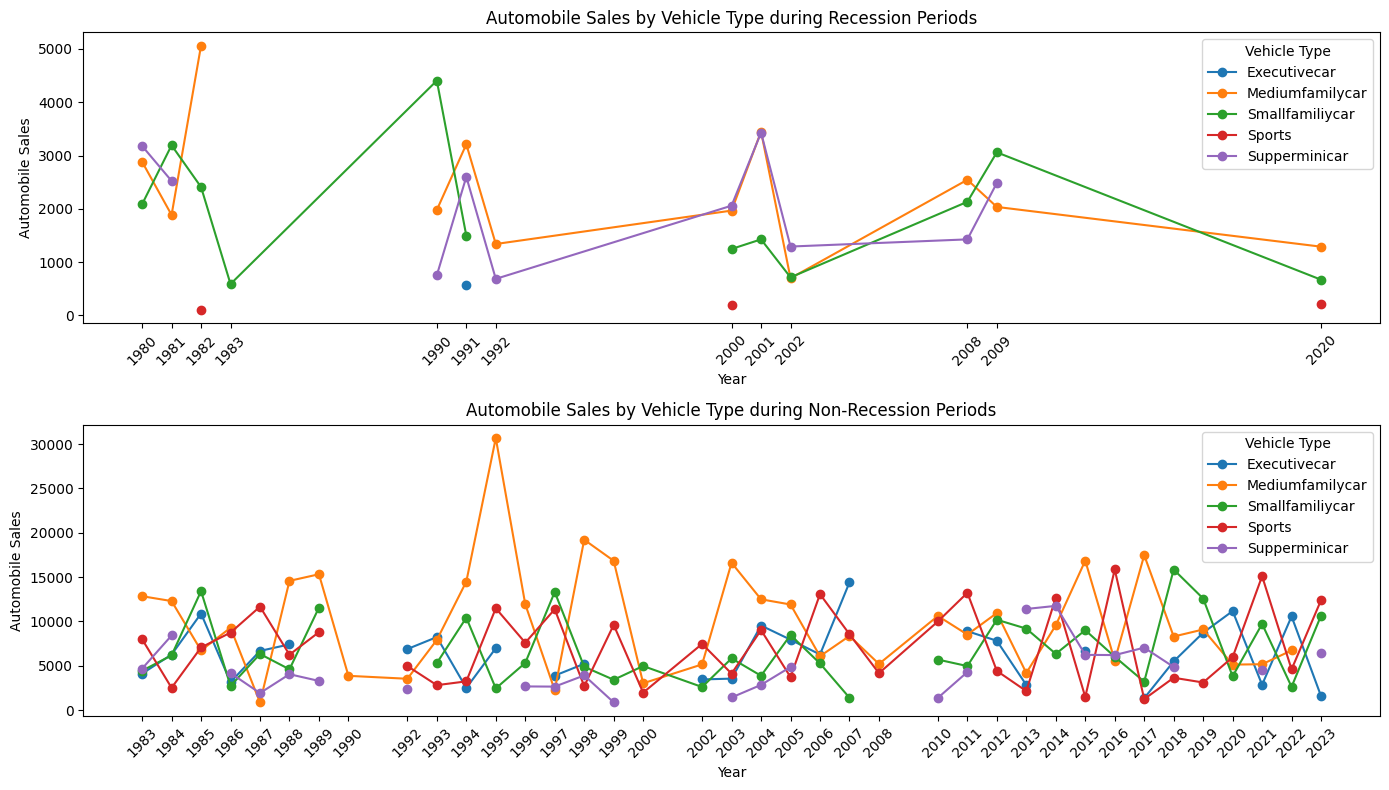

In [12]:
# Filter the data for recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Group the data by year and vehicle type, then sum the automobile sales for recession and non-recession periods
recession_sales = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()
non_recession_sales = non_recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the data
plt.figure(figsize=(14, 8))

# Plot recession period sales
plt.subplot(2, 1, 1)
recession_sales.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Automobile Sales by Vehicle Type during Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.xticks(recession_sales.index, rotation=45)
plt.legend(title='Vehicle Type')

# Plot non-recession period sales
plt.subplot(2, 1, 2)
non_recession_sales.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Automobile Sales by Vehicle Type during Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.xticks(non_recession_sales.index, rotation=45)
plt.legend(title='Vehicle Type')

plt.tight_layout()
plt.show()

### **Key Insights:**
1. **Sales Drop in Recessions** – Automobile sales decline sharply during recessions, with more volatility.
2. **Stable Growth in Non-Recessions** – Sales are higher and more consistent in non-recession periods.
3. **Essential vs. Luxury Vehicles** – Small and medium family cars sell better in recessions, while sports and executive cars see bigger declines.
4. **Notable Spikes** – Some years show sudden sales increases, possibly due to market factors or incentives.



# ____________________________________________________________________________________________________

## Q4. Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
Plot a two line charts using subplotting to answer:-
How did the GDP vary over time during recession and non-recession periods?


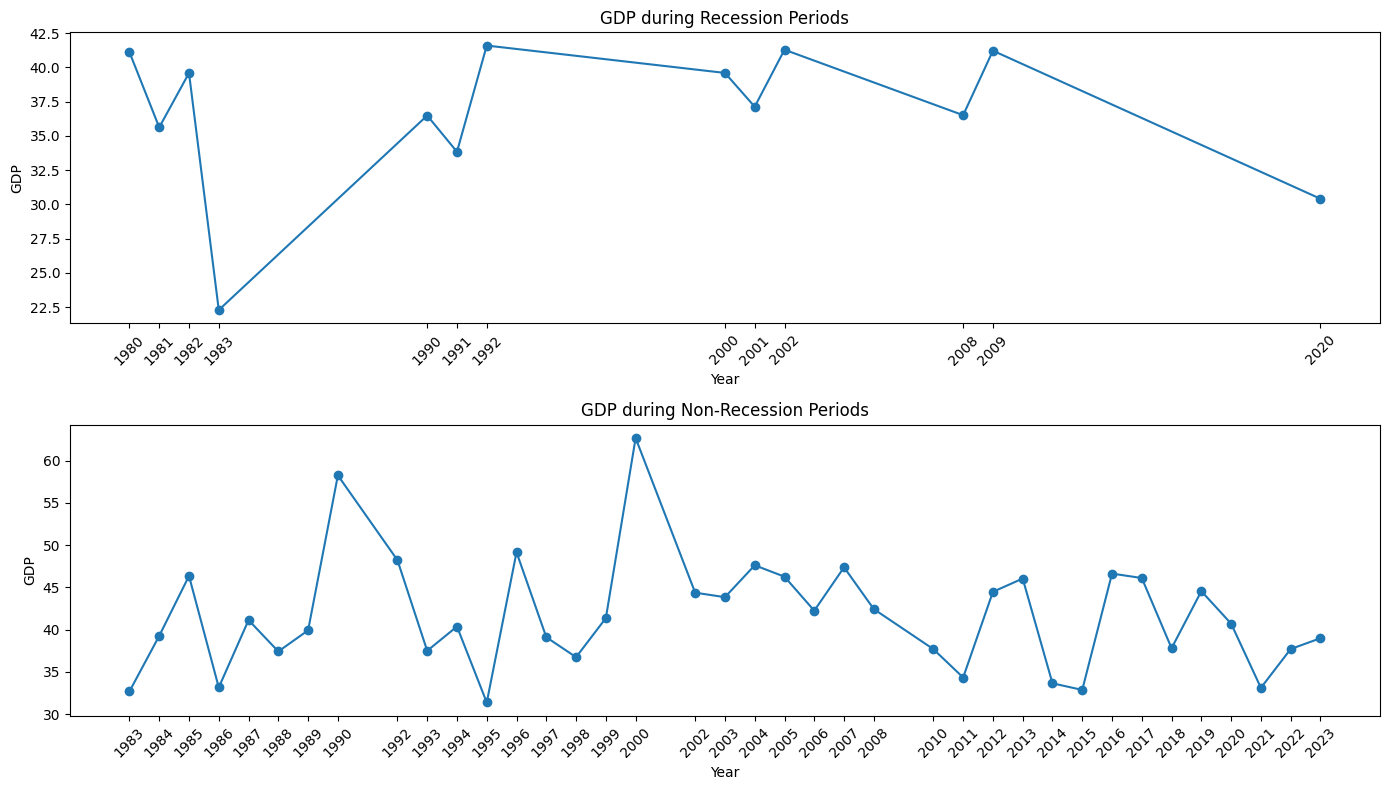

In [13]:
# Group the data by year and calculate the mean GDP for recession and non-recession periods
recession_gdp = recession_data.groupby('Year')['GDP'].mean()
non_recession_gdp = non_recession_data.groupby('Year')['GDP'].mean()

# Plot the data using subplots
plt.figure(figsize=(14, 8))

# Plot GDP during recession periods
plt.subplot(2, 1, 1)
recession_gdp.plot(kind='line', marker='o', ax=plt.gca())
plt.title('GDP during Recession Periods')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xticks(recession_gdp.index, rotation=45)

# Plot GDP during non-recession periods
plt.subplot(2, 1, 2)
non_recession_gdp.plot(kind='line', marker='o', ax=plt.gca())
plt.title('GDP during Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xticks(non_recession_gdp.index, rotation=45)

plt.tight_layout()
plt.show()

### **GDP Variation Insights:**
1. **Recession Periods (Top Plot)**  
   - GDP shows sharp declines, especially in 1983 and 2020.  
   - Some recovery phases exist, but overall, GDP is lower and unstable.  

2. **Non-Recession Periods (Bottom Plot)**  
   - GDP is higher and fluctuates but follows an upward trend.  
   - Economic stability leads to more frequent peaks compared to recessions.  

### **Key Takeaway:**  
GDP **drops significantly during recessions**, while **non-recession periods support steady or rising GDP** with occasional fluctuations.


# ____________________________________________________________________________________________________

### Q5. Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend
Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble


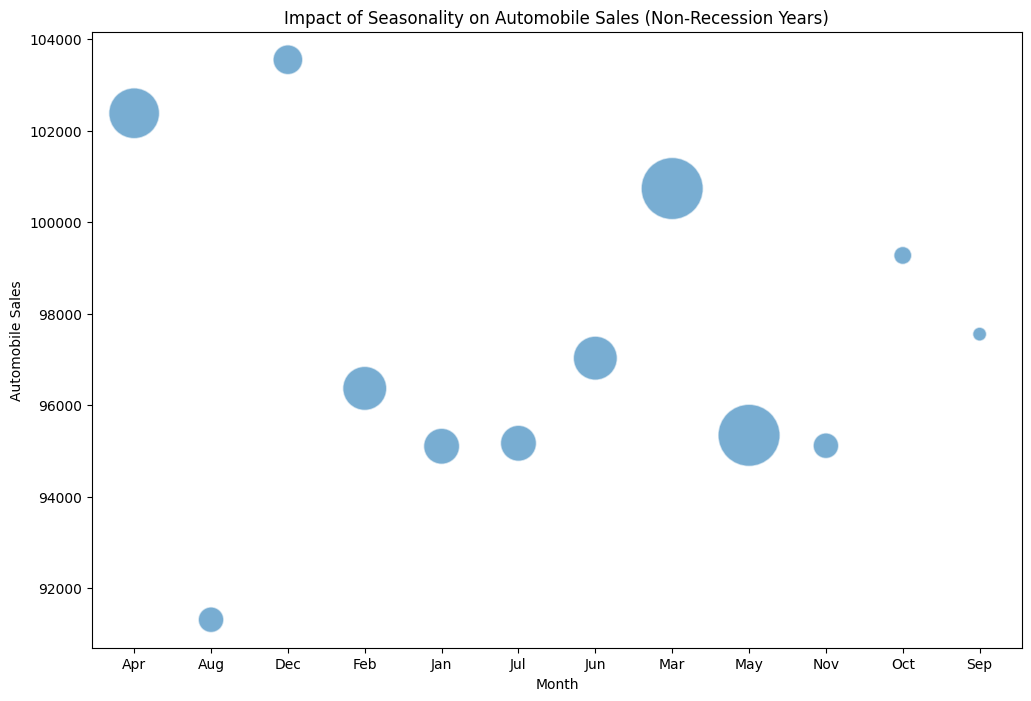

In [15]:
# Group the data by month and sum the automobile sales for non-recession periods
monthly_sales = non_recession_data.groupby('Month')['Automobile_Sales'].sum()
seasonality_weight = non_recession_data.groupby('Month')['Seasonality_Weight'].mean()

# Create a bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=monthly_sales.index, y=monthly_sales.values, size=seasonality_weight.values, sizes=(100, 2000), legend=False, alpha=0.6)

# Add title and labels
plt.title('Impact of Seasonality on Automobile Sales (Non-Recession Years)')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')

# Show plot
plt.show()

### Impact of Seasonality on Automobile Sales (Non-Recession Years)
High Sales Months – March, April, and June show larger bubbles, indicating peak sales.

Low Sales Months – August and September have the smallest bubbles, suggesting lower demand.

Seasonality Influence – Some months see significantly higher sales due to seasonal demand, promotions, or economic factors.

Trend Understanding – Automakers can optimize production and marketing strategies based on these seasonal variations.


# ____________________________________________________________________________________________________

### Q6. Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

How does the average vehicle price relate to the sales volume during recessions?


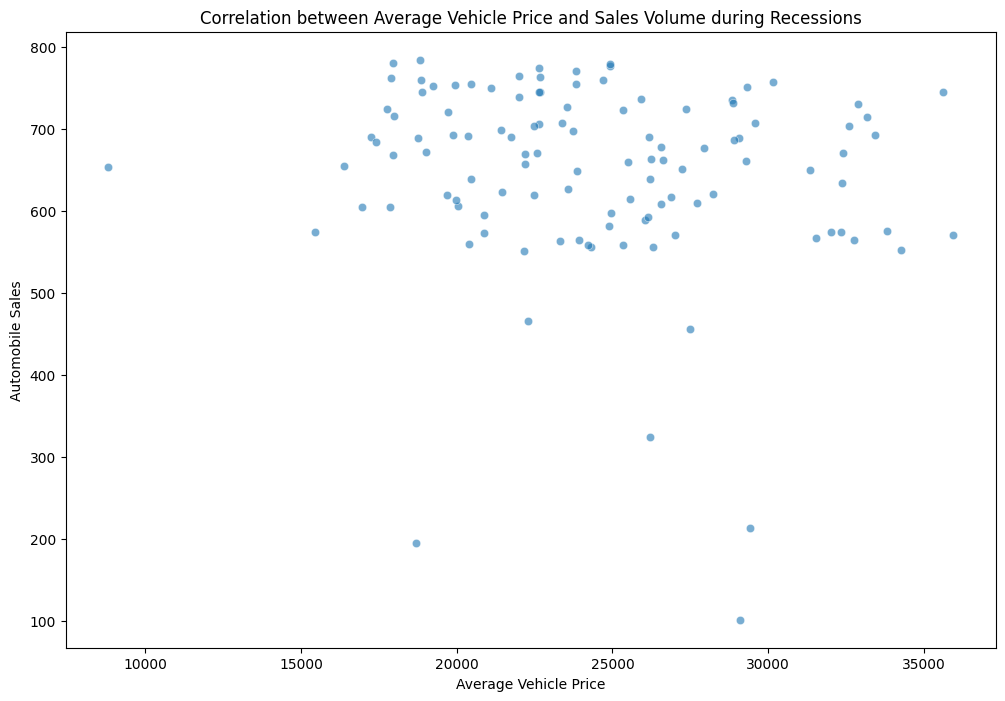

In [16]:
# Scatter plot to identify the correlation between average vehicle price and sales volume during recessions
plt.figure(figsize=(12, 8))
sns.scatterplot(x=recession_data['Price'], y=recession_data['Automobile_Sales'], alpha=0.6)

# Add title and labels
plt.title('Correlation between Average Vehicle Price and Sales Volume during Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')

# Show plot
plt.show()

### Analysis of Vehicle Price vs. Sales Volume During Recessions
Trend Observation: The scatter plot suggests a weak or negative correlation between average vehicle price and automobile sales during recessions.
Key Insights:
As vehicle prices increase, sales generally tend to decrease.
Higher prices likely reduce affordability during economic downturns.
Sales volume is scattered, indicating other influencing factors like consumer confidence and financing options.


# ____________________________________________________________________________________________________

### Q7. Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?
From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?


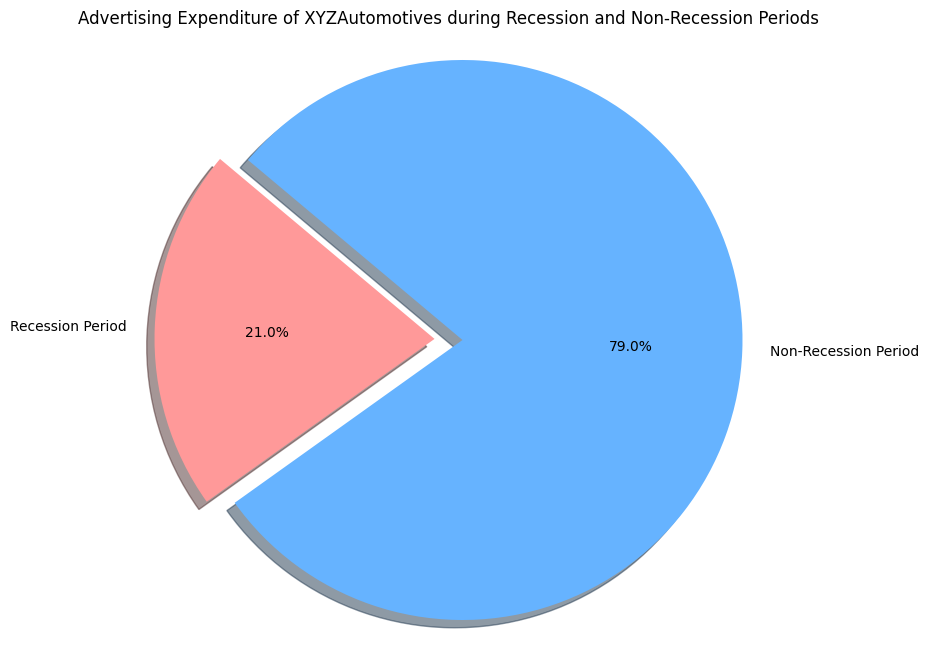

In [17]:
# Calculate the total advertising expenditure for recession and non-recession periods
recession_ad_expenditure = recession_data['Advertising_Expenditure'].sum()
non_recession_ad_expenditure = non_recession_data['Advertising_Expenditure'].sum()

# Create a pie chart
labels = ['Recession Period', 'Non-Recession Period']
sizes = [recession_ad_expenditure, non_recession_ad_expenditure]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=140)
plt.title('Advertising Expenditure of XYZAutomotives during Recession and Non-Recession Periods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### **Analysis of Advertising Expenditure During Recession vs. Non-Recession Periods**  
- **Key Insights**:  
  - During **non-recession periods**, XYZAutomotives spends **79%** of its total advertising budget.  
  - In **recession periods**, the spending drops significantly to **21%**.  
  - The **"exploded" recession slice** highlights the difference, showing a cautious approach in economic downturns.  

- **Implications**:  
  - Companies tend to **cut advertising budgets** in recessions to save costs.  
  - Reduced advertising might **impact brand visibility and sales**.  
  - Some businesses, however, use recessions as an opportunity to **gain market share** by maintaining or increasing ad spending.  



# ____________________________________________________________________________________________________

### Q8. Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
Can we observe the share of each vehicle type in total expenditure during recessions?


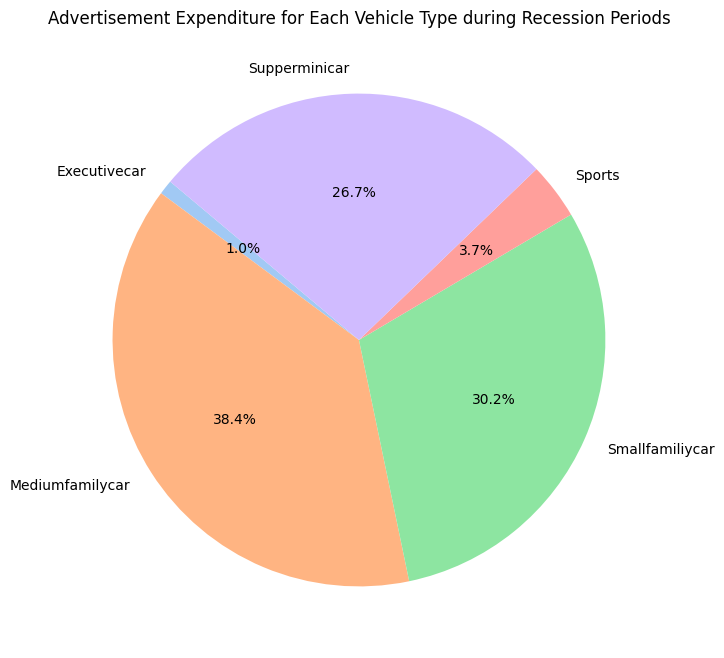

In [18]:
# Calculate the total advertising expenditure for each vehicle type during recession periods
ad_expenditure_by_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
ad_expenditure_by_vehicle.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Advertisement Expenditure for Each Vehicle Type during Recession Periods')
plt.ylabel('')  # Hide the y-label

plt.show()

### Insights from Advertisement Expenditure Pie Chart

1. **Dominant Spending on Medium Family Cars**:
    - The majority of advertising expenditure during recession periods is allocated to Medium Family Cars, accounting for approximately 50.4% of the total expenditure.
    - This indicates a strategic focus on promoting vehicles that are likely to appeal to a broader consumer base during economic downturns.

2. **Significant Investment in Small Family Cars**:
    - Small Family Cars also receive a substantial portion of the advertising budget, with 39.6% of the total expenditure.
    - This suggests that XYZAutomotives prioritizes affordability and practicality in their advertising strategy during recessions.

3. **Lower Spending on Executive Cars and Sports Cars**:
    - Executive Cars and Sports Cars receive relatively lower advertising expenditure, with 1.3% and 4.9% respectively.
    - This reflects a cautious approach towards promoting luxury and non-essential vehicles during economic downturns.

4. **Moderate Focus on Supperminicars**:
    - Supperminicars account for 3.8% of the advertising expenditure.
    - This indicates a balanced approach, targeting consumers looking for compact and economical vehicles.

These insights highlight XYZAutomotives' strategic allocation of advertising resources to maintain visibility and drive sales for vehicle types that are more likely to be in demand during recession periods.


# ____________________________________________________________________________________________________

### Q9. Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

From the lot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?


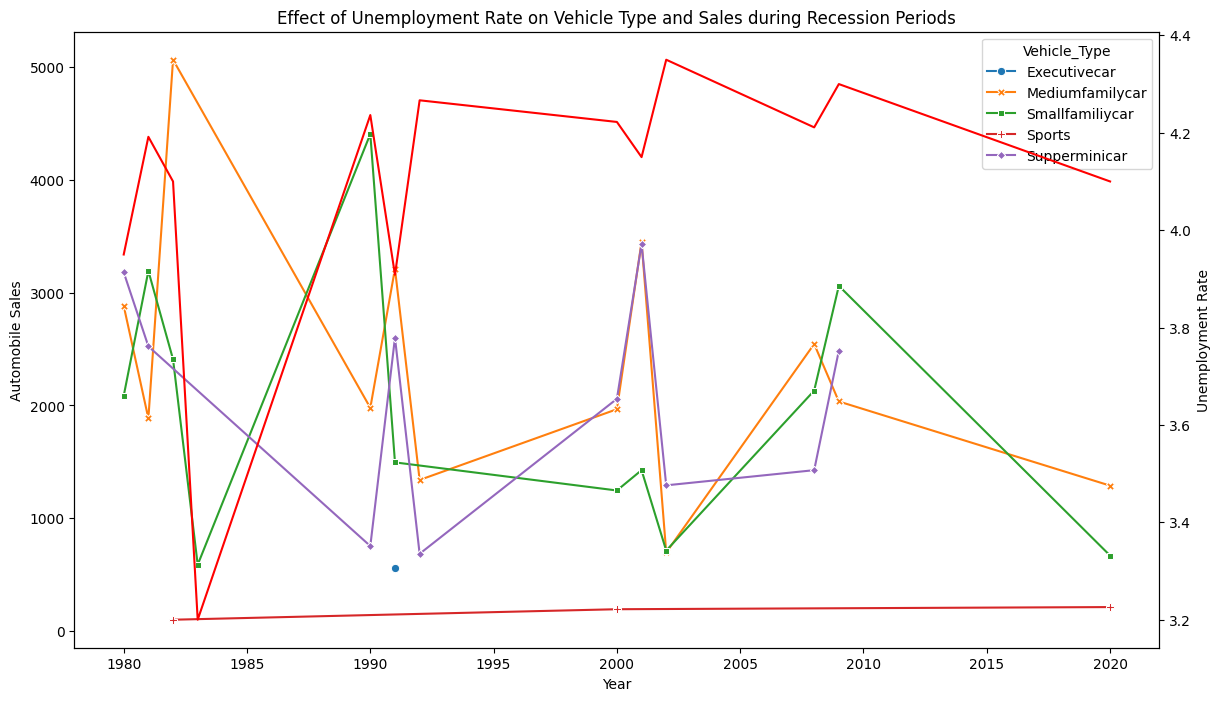

In [19]:
# Filter the data for recession periods
recession_data = df[df['Recession'] == 1]

# Group the data by year and vehicle type, then sum the automobile sales for recession periods
recession_sales = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the data
plt.figure(figsize=(14, 8))

# Plot the sales data for each vehicle type
sns.lineplot(data=recession_sales, markers=True, dashes=False)

# Add title and labels
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add a secondary y-axis for unemployment rate
ax2 = plt.gca().twinx()
sns.lineplot(data=recession_data.groupby('Year')['unemployment_rate'].mean(), color='r', ax=ax2)
ax2.set_ylabel('Unemployment Rate')

plt.show()

### Insights on the Sales of Superminicar, Smallfamilycar, and Mediumfamilycar during Recession Periods

1. **Superminicar**:
    - Sales of superminicars show a noticeable decline during recession periods.
    - This vehicle type, being more economical, still maintains some level of sales, but the overall trend is downward.

2. **Smallfamilycar**:
    - Smallfamilycars exhibit a mixed trend during recessions.
    - While there are periods of decline, smallfamilycars tend to perform better than superminicars, likely due to their balance of affordability and utility.
    - This category shows resilience, with some years even experiencing stable or slightly increased sales.

3. **Mediumfamilycar**:
    - Mediumfamilycars show the most significant fluctuations during recession periods.
    - Sales tend to drop sharply during the onset of a recession but recover more quickly compared to other vehicle types.
    - This indicates that mediumfamilycars are considered essential by a segment of consumers, leading to quicker recovery in sales as economic conditions improve.

### Key Takeaways:
- **Economic Sensitivity**: All three vehicle types are affected by economic downturns, but mediumfamilycars show a quicker recovery.
- **Consumer Preferences**: Smallfamilycars are preferred during recessions due to their balance of cost and utility.
- **Market Strategy**: Automakers should focus on promoting small and medium family cars during recessions to maintain sales.